In [10]:
import pandas as pd
import yfinance as yf
import cufflinks as cf

def compute_drawdowns(dataframe):
    '''
    Function to compute drawdowns of a timeseries
    given a dataframe of prices
    '''
    return (dataframe / dataframe.cummax() -1) * 100

dimensions=(990, 500)

In [21]:
%%capture
SP_1 = yf.download("^GSPC", start="2008-09-20", end="2009-09-19")[['Close']]
SP_2 = yf.download("^GSPC", start="2020-02-13")[['Close']]
SP_3 = yf.download("^GSPC", start="1987-10-05", end="1988-10-05")[['Close']]

In [12]:
SP_1.reset_index(inplace=True)
SP_2.reset_index(inplace=True)
SP_3.reset_index(inplace=True)

In [13]:
SP_1 = SP_1[['Close']]
SP_2 = SP_2[['Close']]
SP_3 = SP_3[['Close']]

In [14]:
SP = SP_1.merge(SP_2, how='left', left_index=True, right_index=True)
SP = SP.merge(SP_3, how='left', left_index=True, right_index=True)

In [15]:
SP = (SP/SP.iloc[0]) * 100
SP.columns = ['2008', '2020', '1987']

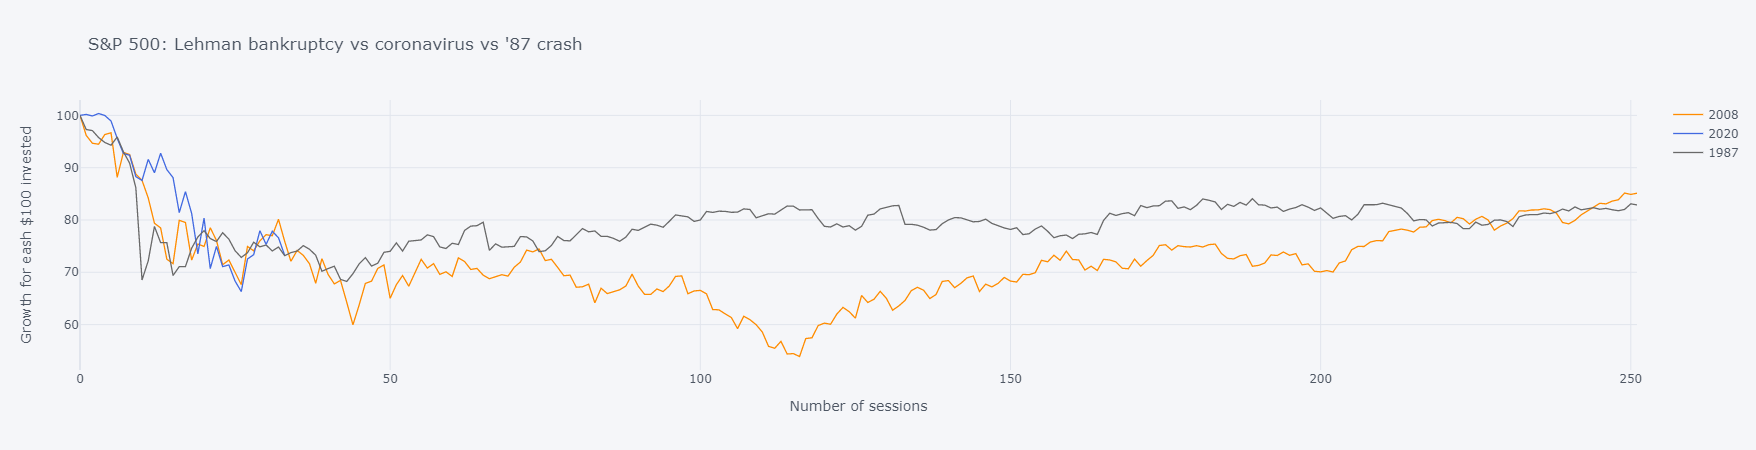

In [19]:
round(SP, 2).iplot(title="S&P 500: Lehman bankruptcy vs coronavirus vs '87 crash",
                   yTitle='Growth for eash $100 invested', xTitle='Number of sessions', colors=['darkorange', 'royalblue', 'dimgrey'])

**Notas:** 
- Ao passar o rato por cima do gráfico aparecem opções (no canto superior direito). Opções relevantes são "Show closest data on hoover" ou "Comparare data on hoover";
- Se clicarem na legendas o respectivo gráfico desaparece (muito útil para ver apenas 2020 e 2008);
- Podem fazer zoom clicando e arrastando

Gráfico patrocinado por [Futureproof](www.futureproof.pt)

Podem ver em baixo os gráfico individuais com as datas:

In [22]:
%%capture
SP_1 = yf.download("^GSPC", start="2008-09-20", end="2009-09-19")[['Close']]
SP_2 = yf.download("^GSPC", start="2020-02-13")[['Close']]
SP_3 = yf.download("^GSPC", start="1987-10-05", end="1988-10-05")[['Close']]

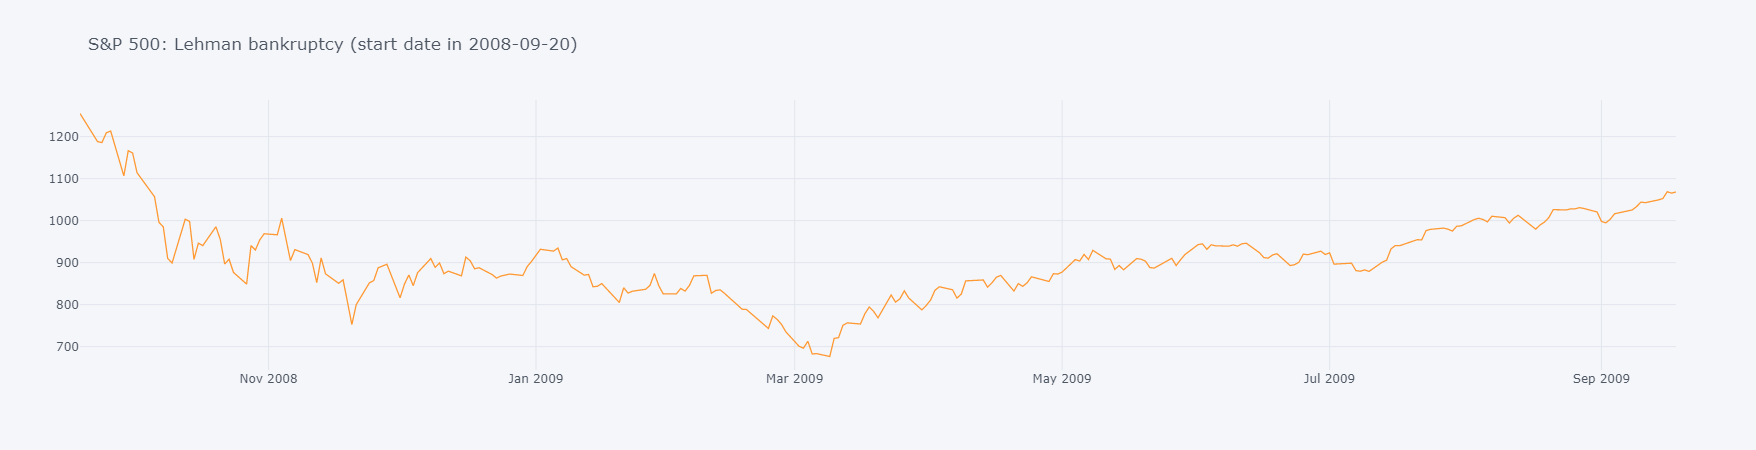

In [24]:
SP_1.iplot(title='S&P 500: Lehman bankruptcy (start date in 2008-09-19)')

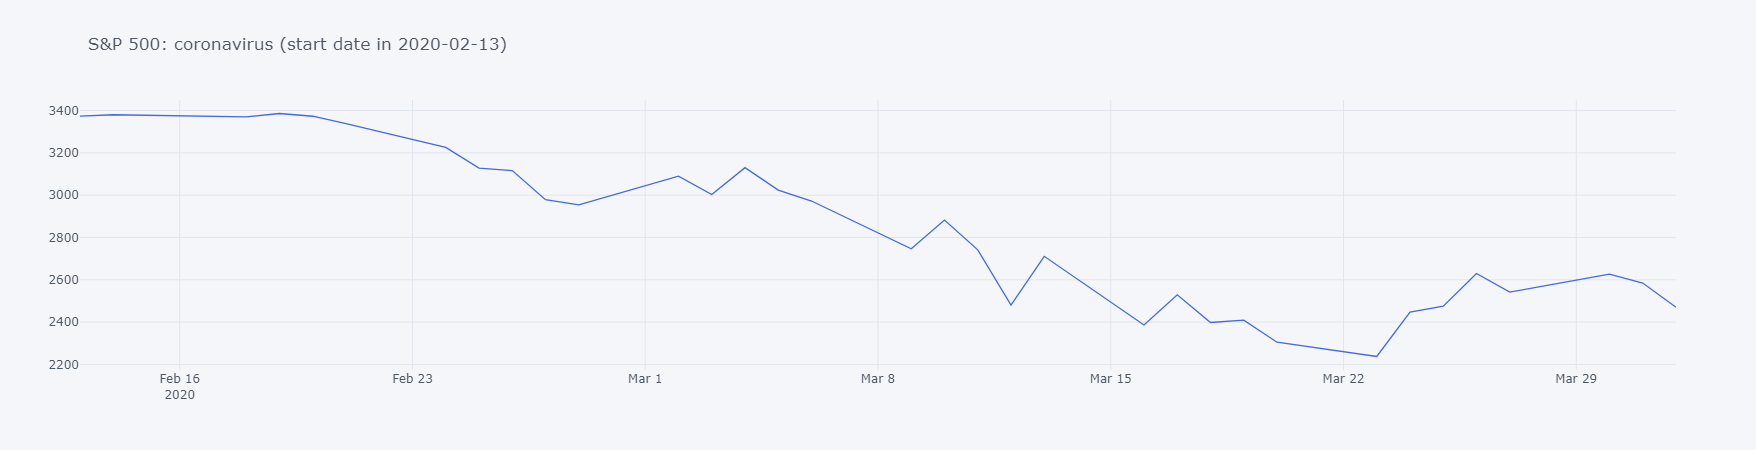

In [29]:
SP_2.iplot(title='S&P 500: coronavirus (start date in 2020-02-13)', color='royalblue')

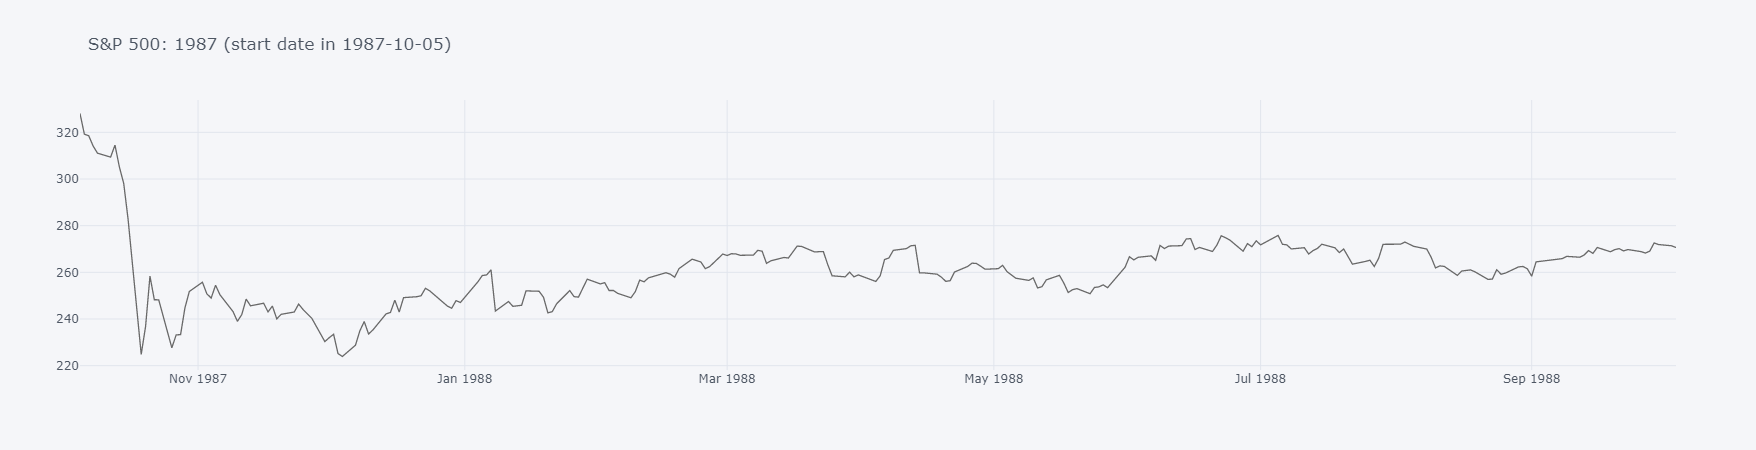

In [31]:
SP_3.iplot(title='S&P 500: 1987 (start date in 1987-10-05)', color='dimgrey')

Gráfico patrocinado por [Futureproof](www.futureproof.pt)